In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #파이썬 Warning 무시

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) #텐서플로우 Warning은 무시하고 Error만 출력

import sys
print("Python 버전:", sys.version)

import platform

if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

Python 버전: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


# 2016 KBO 피타고리언 승률

In [2]:
# 2016 KBO
def cal_x(arr):
    array = []
    for i in range(len(arr)):
        team_lst = []
        if sum(arr[i][1:5]) == 288:
            team = arr[i][0]
            g = arr[i][1] # 전체 게임 수
    #         w = arr[i][2]
    #         l = arr[i][4]
            rs = arr[i][5] # 득점
            ra = arr[i][6] # 실점
            wr = arr[i][7] # 승률
            team_lst.append(team)
            x = ((rs + ra)/g) ** 0.287
            team_lst.append(x)
            ewr = (rs ** x / (rs ** x + ra ** x)) # 기대 승률
            team_lst.append(ewr)
            team_lst.append(wr)
            array.append(team_lst)
    return array

In [3]:
arr = [['두산', 144, 93, 1, 50, 935, 682, 0.650], 
       ['NC', 144, 83, 3, 58, 813, 690, 0.589], 
       ['넥센', 144, 77, 1, 66, 852, 784, 0.538], 
       ['LG', 144, 71, 2, 71, 753, 757, 0.500],
       ['KIA', 144, 70, 1, 73, 857, 785, 0.490],
       ['SK', 144, 69, 0, 75, 786, 807, 0.479],
       ['한화', 144, 66, 3, 75, 826, 865, 0.468], 
       ['롯데', 144, 66, 0, 78, 777, 869, 0.458], 
       ['삼성', 144, 65, 1, 78, 803, 908, 0.455], 
       ['kt', 144, 53, 2, 89, 672, 927, 0.373]]
lists2016=cal_x(arr)
lists2016

[['두산', 2.0019339307404524, 0.6528621249766254, 0.65],
 ['NC', 1.960366137965155, 0.5797086539090532, 0.589],
 ['넥센', 2.008656949579129, 0.5416718781616443, 0.538],
 ['LG', 1.962982141850754, 0.49740004100554097, 0.5],
 ['KIA', 2.010768437562548, 0.5439992409045892, 0.49],
 ['SK', 1.9933607033263094, 0.4868633503927946, 0.479],
 ['한화', 2.0278096252173343, 0.4766289288194907, 0.468],
 ['롯데', 2.012173041853624, 0.44394469942057146, 0.458],
 ['삼성', 2.03466407717796, 0.43781385409578005, 0.455],
 ['kt', 1.9955125978275852, 0.3448065785056982, 0.373]]

['두산', 'NC', '넥센', 'LG', 'KIA', 'SK', '한화', '롯데', '삼성', 'kt']
[0.6528621249766254, 0.5797086539090532, 0.5416718781616443, 0.49740004100554097, 0.5439992409045892, 0.4868633503927946, 0.4766289288194907, 0.44394469942057146, 0.43781385409578005, 0.3448065785056982]
[0.65, 0.589, 0.538, 0.5, 0.49, 0.479, 0.468, 0.458, 0.455, 0.373]


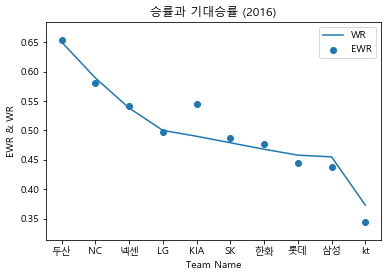

In [4]:
x_data=[]
ewr_data=[]
wr_data=[]
for i in range(len(lists2016)):
    x_data.append(lists2016[i][0])
    ewr_data.append(lists2016[i][2])
    wr_data.append(lists2016[i][3])
    
print(x_data)
print(ewr_data)
print(wr_data)

plt.scatter(x_data, ewr_data)
plt.plot(x_data, wr_data)
plt.xlabel('Team Name')
plt.ylabel('EWR & WR')
plt.title('승률과 기대승률 (2016)')
plt.legend(['WR', 'EWR'])
plt.show()

# 2017 KBO 피타고리언 승률

In [5]:
# 2017 KBO
def cal_x(arr):
    array = []
    for i in range(len(arr)):
        team_lst = []
        #if sum(arr[i][0:]) == 288:
        team = arr[i][0]
        g = arr[i][1] # 전체 게임 수
#         w = arr[i][2]
#         l = arr[i][4]
        rs = arr[i][5] # 득점
        ra = arr[i][6] # 실점
        wr = arr[i][7] # 승률
        team_lst.append(team)
        x = ((rs + ra)/g) ** 0.287
        team_lst.append(x)
        ewr = (rs ** x / (rs ** x + ra ** x)) # 기대 승률
        team_lst.append(ewr)
        team_lst.append(wr)
        array.append(team_lst)
    return array

In [6]:
arr = [['KIA', 144, 87, 1, 56, 906, 743, 0.608], # 경기수 승 무 패 득 실 승률
       ['두산', 144, 84, 3, 57, 849, 678, 0.596], 
       ['롯데', 144, 80, 2, 62, 743, 701, 0.563], 
       ['NC', 144, 79, 3, 62, 786, 745, 0.56],
       ['SK', 144, 75, 1, 68, 761, 767, 0.524],
       ['LG', 144, 69, 3, 72, 699, 677, 0.489],
       ['넥센', 144, 69, 2, 73, 789, 764, 0.486], 
       ['한화', 144, 61, 2, 81, 737, 820, 0.43], 
       ['삼성', 144, 55, 5, 84, 757, 911, 0.396], 
       ['kt', 144, 50, 0, 94, 655, 876, 0.347]]
lists2017=cal_x(arr)
lists2017

[['KIA', 2.0132248987597454, 0.5985217709236074, 0.608],
 ['두산', 1.9692994898793323, 0.6089543228216329, 0.596],
 ['롯데', 1.937964196238216, 0.528161805055163, 0.563],
 ['NC', 1.9707786305102772, 0.5263704294947738, 0.56],
 ['SK', 1.9696695337899193, 0.4961329050076046, 0.524],
 ['LG', 1.9113202245677972, 0.5152759959627624, 0.489],
 ['넥센', 1.978865024226476, 0.5159237501393235, 0.486],
 ['한화', 1.98032648858549, 0.4473624096126023, 0.43],
 ['삼성', 2.019855168982936, 0.40756612818362087, 0.396],
 ['kt', 1.9707786305102772, 0.3605526817263632, 0.347]]

['KIA', '두산', '롯데', 'NC', 'SK', 'LG', '넥센', '한화', '삼성', 'kt']
[0.5985217709236074, 0.6089543228216329, 0.528161805055163, 0.5263704294947738, 0.4961329050076046, 0.5152759959627624, 0.5159237501393235, 0.4473624096126023, 0.40756612818362087, 0.3605526817263632]
[0.608, 0.596, 0.563, 0.56, 0.524, 0.489, 0.486, 0.43, 0.396, 0.347]


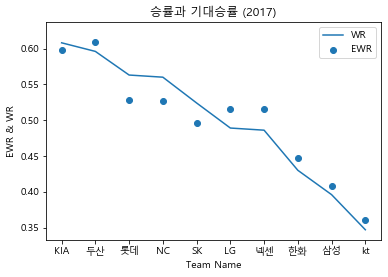

In [7]:
x_data=[]
ewr_data=[]
wr_data=[]
for i in range(len(lists2017)):
    x_data.append(lists2017[i][0])
    ewr_data.append(lists2017[i][2])
    wr_data.append(lists2017[i][3])
    
print(x_data)
print(ewr_data)
print(wr_data)

plt.scatter(x_data, ewr_data)
plt.plot(x_data, wr_data)
plt.xlabel('Team Name')
plt.ylabel('EWR & WR')
plt.title('승률과 기대승률 (2017)')
plt.legend(['WR', 'EWR'])
plt.show()

# 2018 KBO 피타고리언 승률

In [8]:
# 2018 KBO
def cal_x(arr):
    array = []
    for i in range(len(arr)):
        team_lst = []
        #if sum(arr[i][0:]) == 288:
        team = arr[i][0]
        g = arr[i][1] # 전체 게임 수
#         w = arr[i][2]
#         l = arr[i][4]
        rs = arr[i][5] # 득점
        ra = arr[i][6] # 실점
        wr = arr[i][7] # 승률
        team_lst.append(team)
        x = ((rs + ra)/g) ** 0.287
        team_lst.append(x)
        ewr = (rs ** x / (rs ** x + ra ** x)) # 기대 승률
        team_lst.append(ewr)
        team_lst.append(wr)
        array.append(team_lst)
    return array

In [9]:
arr = [['두산', 144, 93, 0, 51, 944, 756, 0.646],
       ['SK', 144, 69, 0, 75, 829, 729, 0.545],
       ['한화', 144, 77, 0, 67, 729, 761, 0.535], 
       ['넥센', 144, 75, 0, 69, 825, 780, 0.521], 
       ['KIA', 144, 70, 0, 74, 865, 826, 0.4861],
       ['삼성', 144, 68, 4, 72, 776, 802, 0.4857],
       ['롯데', 144, 68, 2, 74,821, 846, 0.479], 
       ['LG', 144, 68, 1, 75, 788, 816, 0.476],
       ['kt', 144, 59, 3, 82, 757, 834, 0.418],
       ['NC', 144, 58, 1, 85, 620, 844, 0.406]]
lists2018=cal_x(arr)
lists2018

[['두산', 2.0309012420733867, 0.6108846387172773, 0.646],
 ['SK', 1.9806914363159178, 0.5633110485146462, 0.545],
 ['한화', 1.9554847066885668, 0.4790106194890715, 0.535],
 ['넥센', 1.997658742779035, 0.5279826334270579, 0.521],
 ['KIA', 2.0278096252173343, 0.5233710711805094, 0.4861],
 ['삼성', 1.9879555680817975, 0.48362704647395993, 0.4857],
 ['롯데', 2.0195075536506186, 0.4848602160868635, 0.479],
 ['LG', 1.9973014496630215, 0.48257248582588974, 0.476],
 ['kt', 1.9926421210721221, 0.45189239520181157, 0.418],
 ['NC', 1.9456299985807812, 0.3543216096413548, 0.406]]

['두산', 'SK', '한화', '넥센', 'KIA', '삼성', '롯데', 'LG', 'kt', 'NC']
[0.6108846387172773, 0.5633110485146462, 0.4790106194890715, 0.5279826334270579, 0.5233710711805094, 0.48362704647395993, 0.4848602160868635, 0.48257248582588974, 0.45189239520181157, 0.3543216096413548]
[0.646, 0.545, 0.535, 0.521, 0.4861, 0.4857, 0.479, 0.476, 0.418, 0.406]


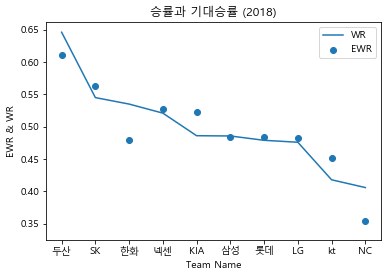

In [10]:
x_data=[]
ewr_data=[]
wr_data=[]
for i in range(len(lists2018)):
    x_data.append(lists2018[i][0])
    ewr_data.append(lists2018[i][2])
    wr_data.append(lists2018[i][3])
    
print(x_data)
print(ewr_data)
print(wr_data)

plt.scatter(x_data, ewr_data)
plt.plot(x_data, wr_data)
plt.xlabel('Team Name')
plt.ylabel('EWR & WR')
plt.title('승률과 기대승률 (2018)')
plt.legend(['WR', 'EWR'])
plt.show()

# 2019 KBO 피타고리언 승률

In [11]:
# 2019 KBO
def cal_x(arr):
    array = []
    for i in range(len(arr)):
        team_lst = []
        #if sum(arr[i][0:]) == 288:
        team = arr[i][0]
        g = arr[i][1] # 전체 게임 수
#         w = arr[i][2]
#         l = arr[i][4]
        rs = arr[i][5] # 득점
        ra = arr[i][6] # 실점
        wr = arr[i][7] # 승률
        team_lst.append(team)
        x = ((rs + ra)/g) ** 0.287
        team_lst.append(x)
        ewr = (rs ** x / (rs ** x + ra ** x)) # 기대 승률
        team_lst.append(ewr)
        team_lst.append(wr)
        array.append(team_lst)
    return array

In [12]:
arr = [['SK', 144, 88, 1, 55, 655, 546, 0.615],
       ['두산', 144, 88, 1, 55, 736, 550, 0.615],
       ['키움', 144, 86, 1, 57, 780, 572, 0.601], 
       ['LG', 144, 79, 1, 64, 641, 633, 0.552], 
       ['NC', 144, 73, 2, 69, 674, 631, 0.514],
       ['KT', 144, 71, 2, 71, 650, 661, 0.500],
       ['KIA', 144, 62, 2, 80, 605, 723, 0.437], 
       ['삼성', 144, 60, 1, 83, 622, 731, 0.420],
       ['한화', 144, 58, 0, 86, 607, 737, 0.403],
       ['롯데', 144, 48, 3, 93, 578, 764, 0.340]]
lists2019=cal_x(arr)
lists2019

[['SK', 1.8381409396136381, 0.5828712851667703, 0.615],
 ['두산', 1.8745719868774005, 0.6332268086427498, 0.615],
 ['키움', 1.9016924192505795, 0.6433236781308013, 0.601],
 ['LG', 1.8695349591478698, 0.5058696189894952, 0.552],
 ['NC', 1.8824791798533393, 0.5309854989833359, 0.514],
 ['KT', 1.884959126031331, 0.49209255980644784, 0.5],
 ['KIA', 1.8919419734625786, 0.41651223008326627, 0.437],
 ['삼성', 1.9020960005156846, 0.4238135115883571, 0.42],
 ['한화', 1.898456082285005, 0.40892462944171665, 0.403],
 ['롯데', 1.8976448528336707, 0.37064952003537754, 0.34]]

['SK', '두산', '키움', 'LG', 'NC', 'KT', 'KIA', '삼성', '한화', '롯데']
[0.5828712851667703, 0.6332268086427498, 0.6433236781308013, 0.5058696189894952, 0.5309854989833359, 0.49209255980644784, 0.41651223008326627, 0.4238135115883571, 0.40892462944171665, 0.37064952003537754]
[0.615, 0.615, 0.601, 0.552, 0.514, 0.5, 0.437, 0.42, 0.403, 0.34]


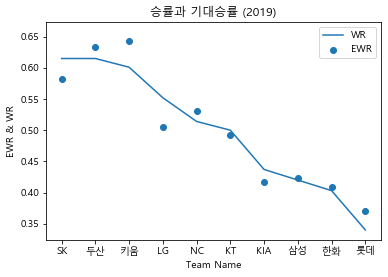

In [13]:
x_data=[]
ewr_data=[]
wr_data=[]
for i in range(len(lists2019)):
    x_data.append(lists2019[i][0])
    ewr_data.append(lists2019[i][2])
    wr_data.append(lists2019[i][3])
    
print(x_data)
print(ewr_data)
print(wr_data)

plt.scatter(x_data, ewr_data)
plt.plot(x_data, wr_data)
plt.xlabel('Team Name')
plt.ylabel('EWR & WR')
plt.title('승률과 기대승률 (2019)')
plt.legend(['WR', 'EWR'])
plt.show()